In [46]:
import matplotlib.pyplot as plt
import numpy as np

In [47]:
import cpp
import panning
import importlib

importlib.reload(cpp)
importlib.reload(panning)
sig, audio = cpp.modify(angle = np.pi/2 + np.pi/4)
audio

Obrót wynosi 135.0 stopni licząc zgodnie z ruchem wskazówek zegara od godziny 9


In [48]:
import panning

fr, obj = cpp.loadSignal("../Audio/speech.wav")
nchannels = obj.getnchannels()
if nchannels > 1:
        left = fr[1::2]
        right = fr[::2]
else:
        left = right = fr

In [49]:
angles = np.arange(0, np.pi+0.01, np.pi/12)
a = [panning.ConstantPowerPan(angle, left, right, returnAmplitudes=True) for angle in angles]
l = [ x[0] for x in a ]
r = [ x[1] for x in a ]

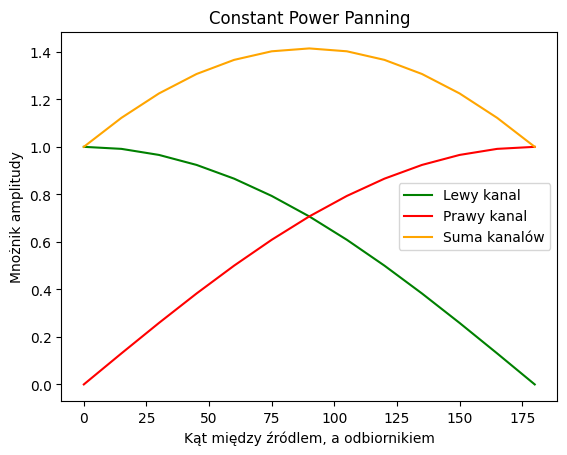

In [50]:
plt.figure()
plt.plot(np.rad2deg(angles), l, color='green', label = "Lewy kanal")
plt.plot(np.rad2deg(angles), r, color='red', label = "Prawy kanal")
plt.plot(np.rad2deg(angles), np.add(l,r), color='orange', label = "Suma kanalów")
ax = plt.gca()
ax.xaxis.label.set_text("Kąt między źródlem, a odbiornikiem")
ax.yaxis.label.set_text("Mnożnik amplitudy")
plt.title("Constant Power Panning")
plt.legend()
plt.show()

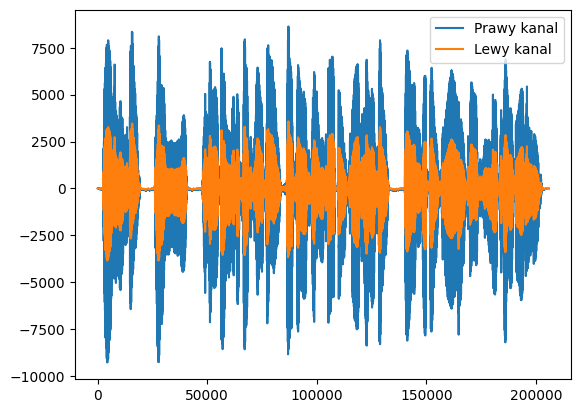

In [51]:
plt.figure()
plt.plot(sig[1::2], label="Prawy kanal")
plt.plot(sig[::2], label="Lewy kanal")
plt.legend()
plt.show()

In [52]:
from IPython.display import Audio

left, right = panning.Pan8d(left, right, obj.getframerate(), 5, 8)
output = "../Audio/8daduiooutput.wav"
cpp.saveSignal(obj, left, right, output)
Audio(filename=output)

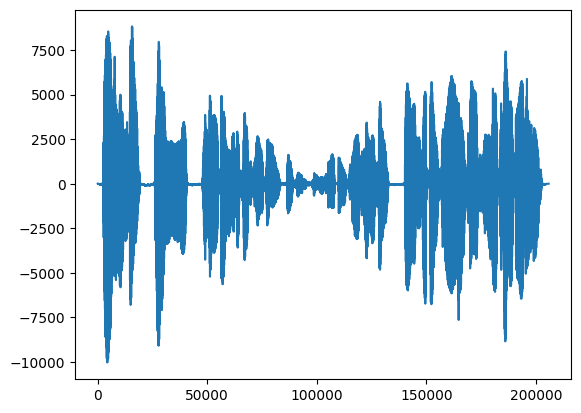

In [53]:
plt.plot(left)

In [116]:
import delay    
importlib.reload(delay)
fr, obj = cpp.loadSignal("../Audio/speech.wav")
nchannels = obj.getnchannels()
if nchannels > 1:
        left = fr[1::2]
        right = fr[::2]
else:
        left = right = fr
a = np.random.randint(-2,2)
left, right = delay.delay(np.pi/2 + a*np.pi/6, left, right, obj.getframerate())
output = "../Audio/delayoutput.wav"
cpp.saveSignal(obj, left, right, output)
Audio(filename=output)

todelay = left
ldel = 9.03678682209849,  a = -0.4999999999999997 , ndelay = 5


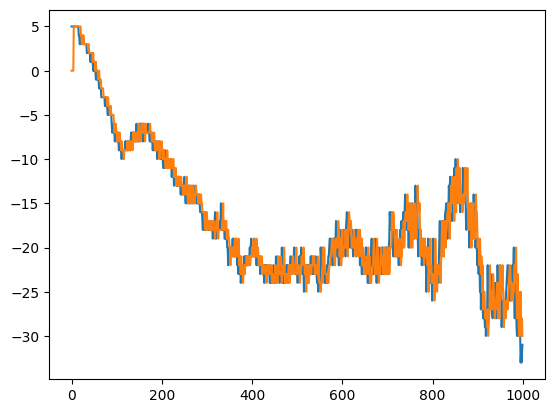

In [93]:
plt.plot(left[:1000])
plt.plot(right[:1000])